
# Logistic Regression - Case Study II



In [25]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### import data

In [2]:
#read the data
df = pd.read_csv('conversion_data.csv')

In [3]:
#sneak peek into the data
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
#more details about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [5]:
#target class frequency
df.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

### Preparing Data For Modeling

In [6]:
#dummy data for categorical variables
df = pd.get_dummies(df, columns=['country','source'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 11 columns):
age                    316200 non-null int64
new_user               316200 non-null int64
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
country_China          316200 non-null uint8
country_Germany        316200 non-null uint8
country_UK             316200 non-null uint8
country_US             316200 non-null uint8
source_Ads             316200 non-null uint8
source_Direct          316200 non-null uint8
source_Seo             316200 non-null uint8
dtypes: int64(4), uint8(7)
memory usage: 11.8 MB


In [9]:
input_columns = [column for column in df.columns if column != 'converted']
output_column = 'converted'
print (input_columns)
print (output_column)

['age', 'new_user', 'total_pages_visited', 'country_China', 'country_Germany', 'country_UK', 'country_US', 'source_Ads', 'source_Direct', 'source_Seo']
converted


In [10]:
#input data
X = df.loc[:,input_columns].values
#output data 
y = df.loc[:,output_column]
#shape of input and output dataset
print (X.shape, y.shape)

(316200, 10) (316200,)


### Modeling : Logistic Regression

In [11]:
#import model specific libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
#Split the data into training and test data (70/30 ratio)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=100, stratify=y)


In [13]:
#validate the shape of train and test dataset
print (X_train.shape)
print (y_train.shape)

print (X_test.shape)
print (y_test.shape)

(221340, 10)
(221340,)
(94860, 10)
(94860,)


In [14]:
#check on number of positive classes in train and test data set
print(np.sum(y_train))
print(np.sum(y_test))

7140
3060


## Train the Logistic Model

In [15]:
#fit the logisitc regression model on training dataset 
logreg = LogisticRegression(class_weight='balanced').fit(X_train,y_train)

In [16]:
#validate the model performance on unseen data
logreg.score(X_test, y_test)

0.94253636938646423

In [17]:
#make predictions on unseen data
predictions=logreg.predict(X_test)

## Results 

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions,target_names=["Non Converted", "Converted"]))

               precision    recall  f1-score   support

Non Converted       1.00      0.94      0.97     91800
    Converted       0.35      0.94      0.51      3060

  avg / total       0.98      0.94      0.95     94860



In [19]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.9410893246187364

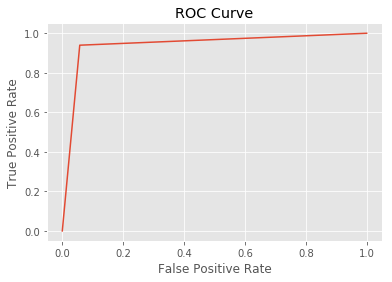

In [20]:
plt.plot(false_positive_rate,true_positive_rate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show() 

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

#fit the logisitc regression model on training dataset 
DT = DecisionTreeClassifier().fit(X_train,y_train)

#validate the model performance on unseen data
DT.score(X_test, y_test)

0.98422939068100357

# Random Forest

In [27]:
#RF

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train,y_train)

#validate the model performance on unseen data
rf.score(X_test, y_test)

0.9844086021505376